In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 10

In [3]:
df = pd.read_csv('8_3.5uW_UVdiode405_4.24.24_m0.txt', sep='\t', header=None, skiprows=1)
df = df.drop(columns=6)
df = df.iloc[1:].reset_index(drop=True)

scale_factors = np.load('scale_factors.npy')
scale_factors

df[[df.columns[1], df.columns[3], df.columns[5]]] = df[[df.columns[1], df.columns[3], df.columns[5]]].mul(scale_factors, axis=0)

uv_paint = df.copy()

uv_paint[1] = uv_paint[[1, 3, 5]].mean(axis=1)
uv_paint = uv_paint.drop(columns=[2, 3, 4, 5])
uv_paint.columns = ['wavelength', 'pl']
uv_paint = uv_paint[(uv_paint['wavelength'] >= 410) & (uv_paint['wavelength'] <=600)]
uv_paint['pl_norm'] = (uv_paint['pl'] - uv_paint['pl'].min()) / (uv_paint['pl'].max() - uv_paint['pl'].min())


In [4]:
decay_data = pd.read_csv('../csvs/uv_decay.csv')
decay_data.columns = ['days', 'normalized_integration']

In [5]:
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

x_data = decay_data['days'].values
y_data = decay_data['normalized_integration'].values

params, covariance = curve_fit(exponential_func, x_data, y_data, p0=(1, -0.1, min(y_data)))

a, b, c = params

x_fit = np.linspace(x_data.min(), x_data.max(), 100)
y_fit = exponential_func(x_fit, a, b, c)

In [6]:
b

-0.25420879787362305

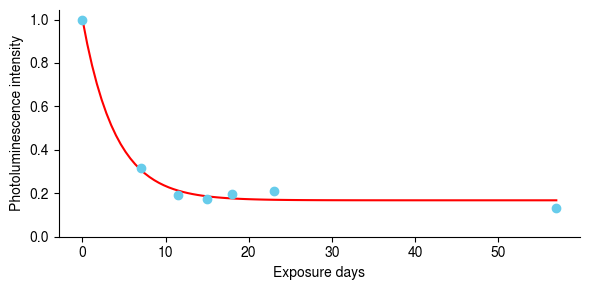

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))

plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = {a:.2f} * exp({b:.2f} * x)', zorder=1)
plt.scatter(decay_data['days'], decay_data['normalized_integration'], color = '#67cceb', alpha=1, zorder=2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(bottom=0)
plt.ylabel('Photoluminescence intensity')
plt.xlabel('Exposure days')
# plt.grid(True)

plt.tight_layout()
# plt.savefig('../figs/uv_decay.png', format='png', dpi=300)

In [18]:
blue_data = pd.read_csv('a1_blue.txt', delimiter='\t', header=0)
blue_data = blue_data.iloc[:, :-1]
blue_data.columns = ['wavelength', 'refl']


blue_data = blue_data[(blue_data['wavelength'] >= 380) & (blue_data['wavelength'] <=700)]
# blue_data = blue_data[(blue_data['wavelength'] <=600)]
blue_data['refl_norm'] = (blue_data['refl'] - blue_data['refl'].min()) / (blue_data['refl'].max() - blue_data['refl'].min())

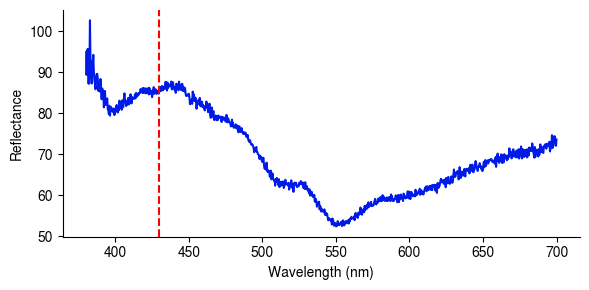

In [19]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(blue_data['wavelength'], blue_data['refl'], color = '#001be8')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim(400,700)
plt.axvline(x=430, color='red', linestyle='--', linewidth=1.5)
# plt.ylim((0, 1))
plt.ylabel('Reflectance')
plt.xlabel('Wavelength (nm)')

plt.tight_layout()
# plt.savefig('../figs/blue_spectrum.png', format='png', dpi=300)

In [10]:
))

SyntaxError: unmatched ')' (840618910.py, line 1)

In [ ]:
bvt_refl = pd.read_csv('bvt_refl.csv')
bvt_refl.columns = ['wavelength', 'refl']
bvt_refl = bvt_refl[(bvt_refl['wavelength'] >= 400) & (bvt_refl['wavelength'] <=600)]
bvt_refl['refl_norm'] = (bvt_refl['refl'] - bvt_refl['refl'].min()) / (bvt_refl['refl'].max() - bvt_refl['refl'].min())

bvt_pl = pd.read_csv('bvt_pl.csv')
bvt_pl.columns = ['wavelength', 'pl']
bvt_pl = bvt_pl[(bvt_pl['wavelength'] >= 410) & (bvt_pl['wavelength'] <=600)]
bvt_pl['pl_norm'] = (bvt_pl['pl'] - bvt_pl['pl'].min()) / (bvt_pl['pl'].max() - bvt_pl['pl'].min())


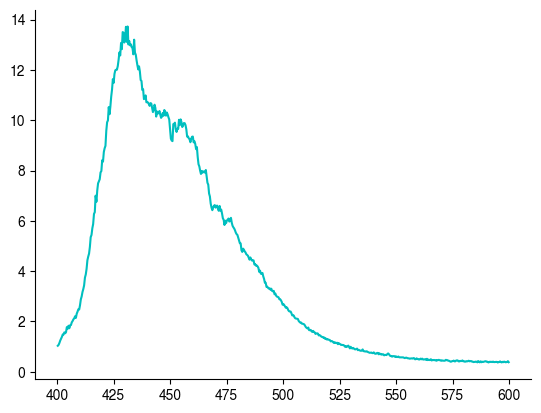

In [ ]:
bvt_refl
plt.plot(bvt_refl['wavelength'], bvt_refl['refl'], label='bvt', color='c')

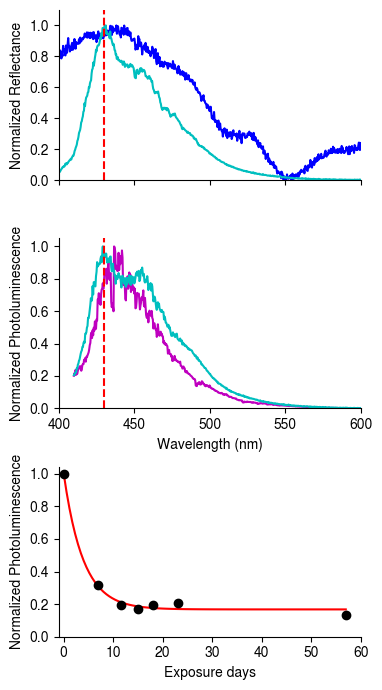

In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Sans'


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 7), gridspec_kw={'height_ratios': [1, 1, 1]})

ax1.plot(blue_data['wavelength'], blue_data['refl_norm'], label='ink', color='b')
ax1.plot(bvt_refl['wavelength'], bvt_refl['refl_norm'], label='bvt', color='c')
# ax1.xlabel('Wavelength (nm)')
ax1.set_ylabel('Normalized Reflectance')

# ax1.plot(blue_data['wavelength'], blue_data['refl'], color='#001be8')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.axvline(x=430, color='red', linestyle='--', linewidth=1.5)
ax1.set_xlim(400, 600)
ax1.set_ylim((0, 1.1))
# ax1.set_ylabel('Reflectance intensity')
ax1.set_xticklabels([])


# for i in range(0, 6, 2):
#     filtered_data = df[df[i] >= 410]
#     ax2.plot(filtered_data[i], filtered_data[i + 1], label=f'Trace {i // 2 + 1}', lw=0.5, color='#67cceb')
uv_paint = uv_paint[uv_paint['wavelength'] >= 410]


ax2.plot(uv_paint['wavelength'], uv_paint['pl_norm'], color='m')
ax2.plot(bvt_pl['wavelength'], bvt_pl['pl_norm'], color='c')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim(400, 600)
ax2.axvline(x=430, color='red', linestyle='--', linewidth=1.5)
ax2.set_ylim(bottom=0)
ax2.set_ylabel('Normalized Photoluminescence')
ax2.set_xlabel('Wavelength (nm)')

ax3.plot(x_fit, y_fit, color='red', label=f'Fit: y = {a:.2f} * exp({b:.2f} * x)', zorder=1)
ax3.scatter(decay_data['days'], decay_data['normalized_integration'], color='k', alpha=1, zorder=2)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_ylim(bottom=0)
ax3.set_xlim(-1, 60)
ax3.set_ylabel('Normalized Photoluminescence')
ax3.set_xlabel('Exposure days')

plt.tight_layout()
# plt.savefig('../figs/combined_spectra.svg', format='svg')

/tmp/ipykernel_4074222/3262509470.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_filtered['minmax'] = (yellow_filtered['norm'] - yellow_filtered['norm'].min()) / (yellow_filtered['norm'].max() - yellow_filtered['norm'].min())
/tmp/ipykernel_4074222/3262509470.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_filtered['minmax'] = (green_filtered['norm'] - green_filtered['norm'].min()) / (green_filtered['norm'].max() - green_filtered['norm'].min())


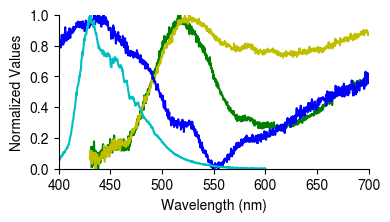

In [ ]:
background_df = pd.read_csv('/home/misha/repos/bee_cam_process_data/plot_spectra/202504_data/rgb_white_background_refl.txt', sep='\t', header=None)
background_data = background_df.iloc[1:].reset_index(drop=True)
avg_background = sum(background_data[i] for i in range(1, 10, 2)) / 5

avg_background

yellow_data = pd.read_csv('202504_data/spectra_20250608/yellow board whitelight june8th.txt', sep='\t', header=None)
yellow_data = yellow_data.drop(columns=[1,2, 4, 6, 8, 10, 12])
yellow_data = yellow_data.drop(index=0).reset_index(drop=True)

yellow_data['avg'] = yellow_data.iloc[:, [1,2,3,4,5]].mean(axis=1)
yellow_data['norm'] = yellow_data['avg']/avg_background

yellow_data[0] = yellow_data[0].astype(float)

yellow_filtered = yellow_data[(yellow_data[0]>430) & (yellow_data[0]<=700)]
yellow_filtered['minmax'] = (yellow_filtered['norm'] - yellow_filtered['norm'].min()) / (yellow_filtered['norm'].max() - yellow_filtered['norm'].min())


green_data = pd.read_csv('202504_data/spectra_20250608/green board whitelight june8th.txt', sep='\t', header=None)
green_data = green_data.drop(columns=[2, 4, 6, 8, 10, 12])
green_data['avg'] = green_data.iloc[:, [1,2,3,4,5,6]].mean(axis=1)
green_data['norm'] = green_data['avg']/avg_background
green_data = green_data.drop(index=0).reset_index(drop=True)
green_data[0] = green_data[0].astype(float)

green_filtered = green_data[(green_data[0]>430) & (green_data[0]<=700)]
green_filtered['minmax'] = (green_filtered['norm'] - green_filtered['norm'].min()) / (green_filtered['norm'].max() - green_filtered['norm'].min())

plt.figure(figsize=(4, 2))

plt.plot(green_filtered[0], (green_filtered['minmax']), color='g')
plt.plot(yellow_filtered[0], (yellow_filtered['minmax']), color='y')
plt.plot(blue_data['wavelength'], blue_data['refl_norm'], label='ink', color='b')
plt.plot(bvt_refl['wavelength'], bvt_refl['refl_norm'], label='bvt', color='c')
plt.xticks(
    ticks=range(400,701,50),
    labels=range(400,701,50)
)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Values')
plt.xlim(400,700)
plt.ylim(0,1)

plt.savefig('../figs/bgy_spectra.svg', format='svg')

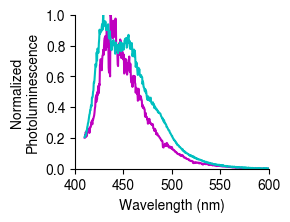

In [ ]:
plt.figure(figsize=(2.5,2))
uv_paint = uv_paint[uv_paint['wavelength'] >= 410]


plt.plot(uv_paint['wavelength'], uv_paint['pl_norm'], color='m')
plt.plot(bvt_pl['wavelength'], bvt_pl['pl_norm'], color='c')

# plt.spines['top'].set_visible(False)
# plt.spines['right'].set_visible(False)
plt.xlim(400, 600)
# plt.axvline(x=430, color='red', linestyle='--', linewidth=1.5)
plt.ylim(0,1)
plt.ylabel('Normalized\nPhotoluminescence')
plt.xlabel('Wavelength (nm)')

plt.savefig('../figs/pl_spectra.svg', format='svg')